In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('breast-cancer.csv')

In [2]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


train-test-scale

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns (like 'id' if present)
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

#  Convert 'diagnosis' column to numbers (B = 0, M = 1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

#  Split into features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train a Linear SVM Model
🎯 Objective:
Train an SVM classifier using a linear kernel to classify tumors as malignant (1) or benign (0).

🔍 Why Linear Kernel?
If the data is roughly linearly separable (i.e., can be split with a straight line/hyperplane), a linear SVM is simple, fast, and effective.

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the Linear SVM model
linear_svm = SVC(kernel='linear')

# Step 2: Train the model
linear_svm.fit(X_train_scaled, y_train)

# Step 3: Predict on test data
y_pred = linear_svm.predict(X_test_scaled)

# Step 4: Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[68  3]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy Score: 0.956140350877193


# Train a Non-Linear SVM (RBF Kernel)
🌟 Why Use RBF?
Linear SVM draws straight boundaries.

RBF (Radial Basis Function) kernel can draw curved decision boundaries.

It’s helpful when data isn’t perfectly linearly separable.



In [7]:
# Step 1: Initialize SVM with RBF kernel (default)
rbf_svm = SVC(kernel='rbf', random_state=42)

# Step 2: Train
rbf_svm.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Step 4: Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix (RBF Kernel):")
print(confusion_matrix(y_test, y_pred_rbf))

print("\nClassification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

print("\nAccuracy Score (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))


Confusion Matrix (RBF Kernel):
[[71  0]
 [ 2 41]]

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy Score (RBF Kernel): 0.9824561403508771


# 📊 Let’s Compare the Results:

| Metric                      | Linear SVM | RBF SVM     |
| --------------------------- | ---------- | ----------- |
| **Accuracy**                | 95.6%      | **98.2%** ✅ |
| **Precision (Malignant)**   | 0.93       | **1.00** ✅  |
| **Recall (Malignant)**      | 0.95       | 0.95        |
| **False Positives (B → M)** | 3          | **0** ✅     |
| **False Negatives (M → B)** | 2          | 2 (same)    |


✅ Interpretation:
RBF SVM correctly predicted all benign tumors (71/71).

It also did not make any false alarms — it never predicted malignant when it was actually benign.

Slightly better precision and overall higher accuracy.

So yes — non-linear SVM (RBF kernel) is clearly doing better here

# Hyperparameter Tuning with GridSearchCV
🔧 Why Tune C and gamma?

| Parameter | Role                                                                                                                                                                                                             |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `C`       | Controls trade-off between **maximizing margin** and **minimizing error**. <br>• Low `C`: wider margin, may allow more misclassifications <br>• High `C`: tighter margin, tries to classify everything correctly |
| `gamma`   | Defines how far the influence of a training point reaches <br>• Low `gamma`: smoother decision boundary <br>• High `gamma`: more complex, may overfit                                                            |


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)

# Fit to scaled training data
grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("🔍 Best Parameters:", grid.best_params_)
print("✅ Best Cross-Validation Score:", grid.best_score_)

# Predict on test set using best estimator
y_pred_best = grid.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nConfusion Matrix (Tuned SVM):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score (Tuned SVM):", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
✅ Best Cross-Validation Score: 0.9736263736263737

Confusion Matrix (Tuned SVM):
[[71  0]
 [ 2 41]]

Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy Score (Tuned SVM): 0.9824561403508771


# Tuned Model Performance:

| Metric              | Value    |
| ------------------- | -------- |
| **Best C**          | `100`    |
| **Best gamma**      | `0.001`  |
| **Accuracy (Test)** | `98.2%`  |
| **Cross-Val Score** | `97.36%` |
| **False Positives** | `0`      |
| **False Negatives** | `2`      |

# Understanding C and gamma in SVM (RBF Kernel)

🔸 C = 100: High Regularization Strength.
C controls how much the model penalizes misclassifications.

Higher C (like 100) means:
The model will try very hard to classify every training point correctly.
It will create a tighter decision boundary, possibly more complex.
Less tolerance for error = lower bias, higher variance.
So your model decided it's better to fit the training data tightly rather than allowing some slack.

👉 In your case: It helped because your features are scaled well, and the data is clean.

🔸 gamma = 0.001: Low Influence per Data Point.
gamma controls how far the influence of a single point spreads.

Lower gamma (like 0.001) means:
Each point influences a larger area, making the decision boundary smoother and less wiggly.
Good for avoiding overfitting, especially in real-world data.

👉 In your case: A small gamma gives a smoother boundary, and paired with a strong C, it balances bias and variance very well.

✅ Why this combination works

The combination of:
High C (more focused, tighter fit)
Low gamma (smoother, less overfitting)
means your model:
Fits the data accurately, without being too sensitive to noise.
Achieves a very high test accuracy (98.2%) without overfitting — as shown by your strong cross-validation score (~97.36%).

# Cross Validation


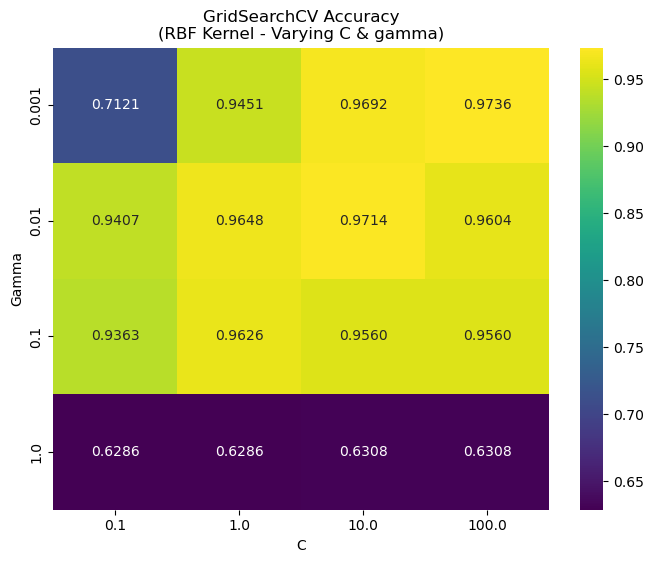

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert GridSearchCV results to DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Pivot for heatmap
scores_matrix = results_df.pivot(index='param_gamma', columns='param_C', values='mean_test_score')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".4f", cmap="viridis")
plt.title("GridSearchCV Accuracy\n(RBF Kernel - Varying C & gamma)")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.show()
